In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [8]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21,8/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,145008,145552,145996,146523,146523,146523,147985,148572,148933,149361
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132922,132952,132999,133036,133081,133121,133146,133211,133310,133442
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,165204,167131,168668,170189,171392,172564,173922,175229,176724,178013
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14586,14586,14655,14678,14678,14678,14747,14766,14797,14809
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,42110,42288,42486,42646,42777,42815,42970,43070,43158,43269


In [9]:
#get all the date of confirmed and column
column= df.keys()

In [ ]:
column

In [10]:
#extract column 4 to the last column
confirmed = df.loc[:, column[4]:column[-1]]

In [11]:
#extract dates to make a column dates
dates=confirmed.keys()

In [12]:
#cummulative sum
world_cases = []
for i in dates:
    confirmed_sum=confirmed[i].sum()#sum cases for each date
    world_cases.append(confirmed_sum)#add each sum to the empty list

In [13]:
#reshape to have one column,multiple rows
#to numpy array for ml modelling
# starting from 22nd of january 2020, get number of days till present
number_of_days = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)

In [ ]:
number_of_days.shape

In [14]:
days_in_future = 7
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)#adding 7days to predict
adjusted_dates = future_forcast[:-7]#remove 7 days for prediction

In [15]:

inception = '1/22/2020'
#convert to datetime
start_date = datetime.datetime.strptime(inception, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):#convert to days for each date in future prediction
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [16]:
# X numberofdays, y is cases
X=number_of_days[50:]#start from day 50
y=world_cases[50:]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.02) #small testset for a few days

In [17]:
#poly regression number
degrees = PolynomialFeatures(degree=4)

In [18]:
#transform train and test set into 3rd order
trans_X_train = degrees.fit_transform(X_train)
trans_X_test = degrees.fit_transform(X_test)
trans_future_forcast = degrees.fit_transform(future_forcast)

In [19]:
#instantiate linearegression
lm = LinearRegression(normalize=True, fit_intercept=False)

In [20]:
lm.fit(trans_X_train,y_train)

LinearRegression(fit_intercept=False, normalize=True)

In [21]:
ypred_test = lm.predict(trans_X_test)

In [22]:
print('The absolute mean square error is:', mean_absolute_error(ypred_test, y_test))
print('The mean square error is:',mean_squared_error(ypred_test, y_test))

The absolute mean square error is: 1445108.5920536334
The mean square error is: 2870096396357.0386


In [23]:
print("The linear model coefficient is:{}".format(lm.coef_))
print("The intercept is :",lm.intercept_)

The linear model coefficient is:[[ 2.12755579e+06 -2.56828535e+04 -1.77533649e+00  3.64753161e+00
  -4.37488664e-03]]
The intercept is : 0.0


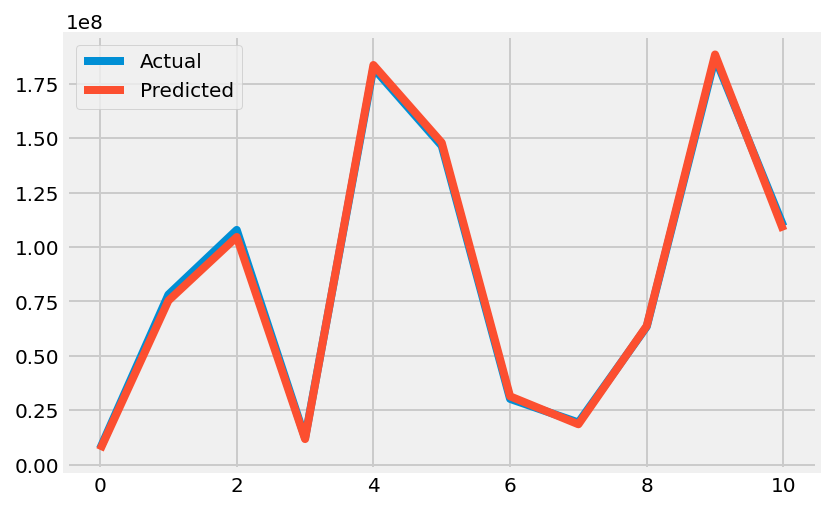

In [24]:
plt.plot(y_test)
plt.plot(ypred_test)
plt.legend(['Actual','Predicted'])

In [26]:
ypred = lm.predict(trans_future_forcast)

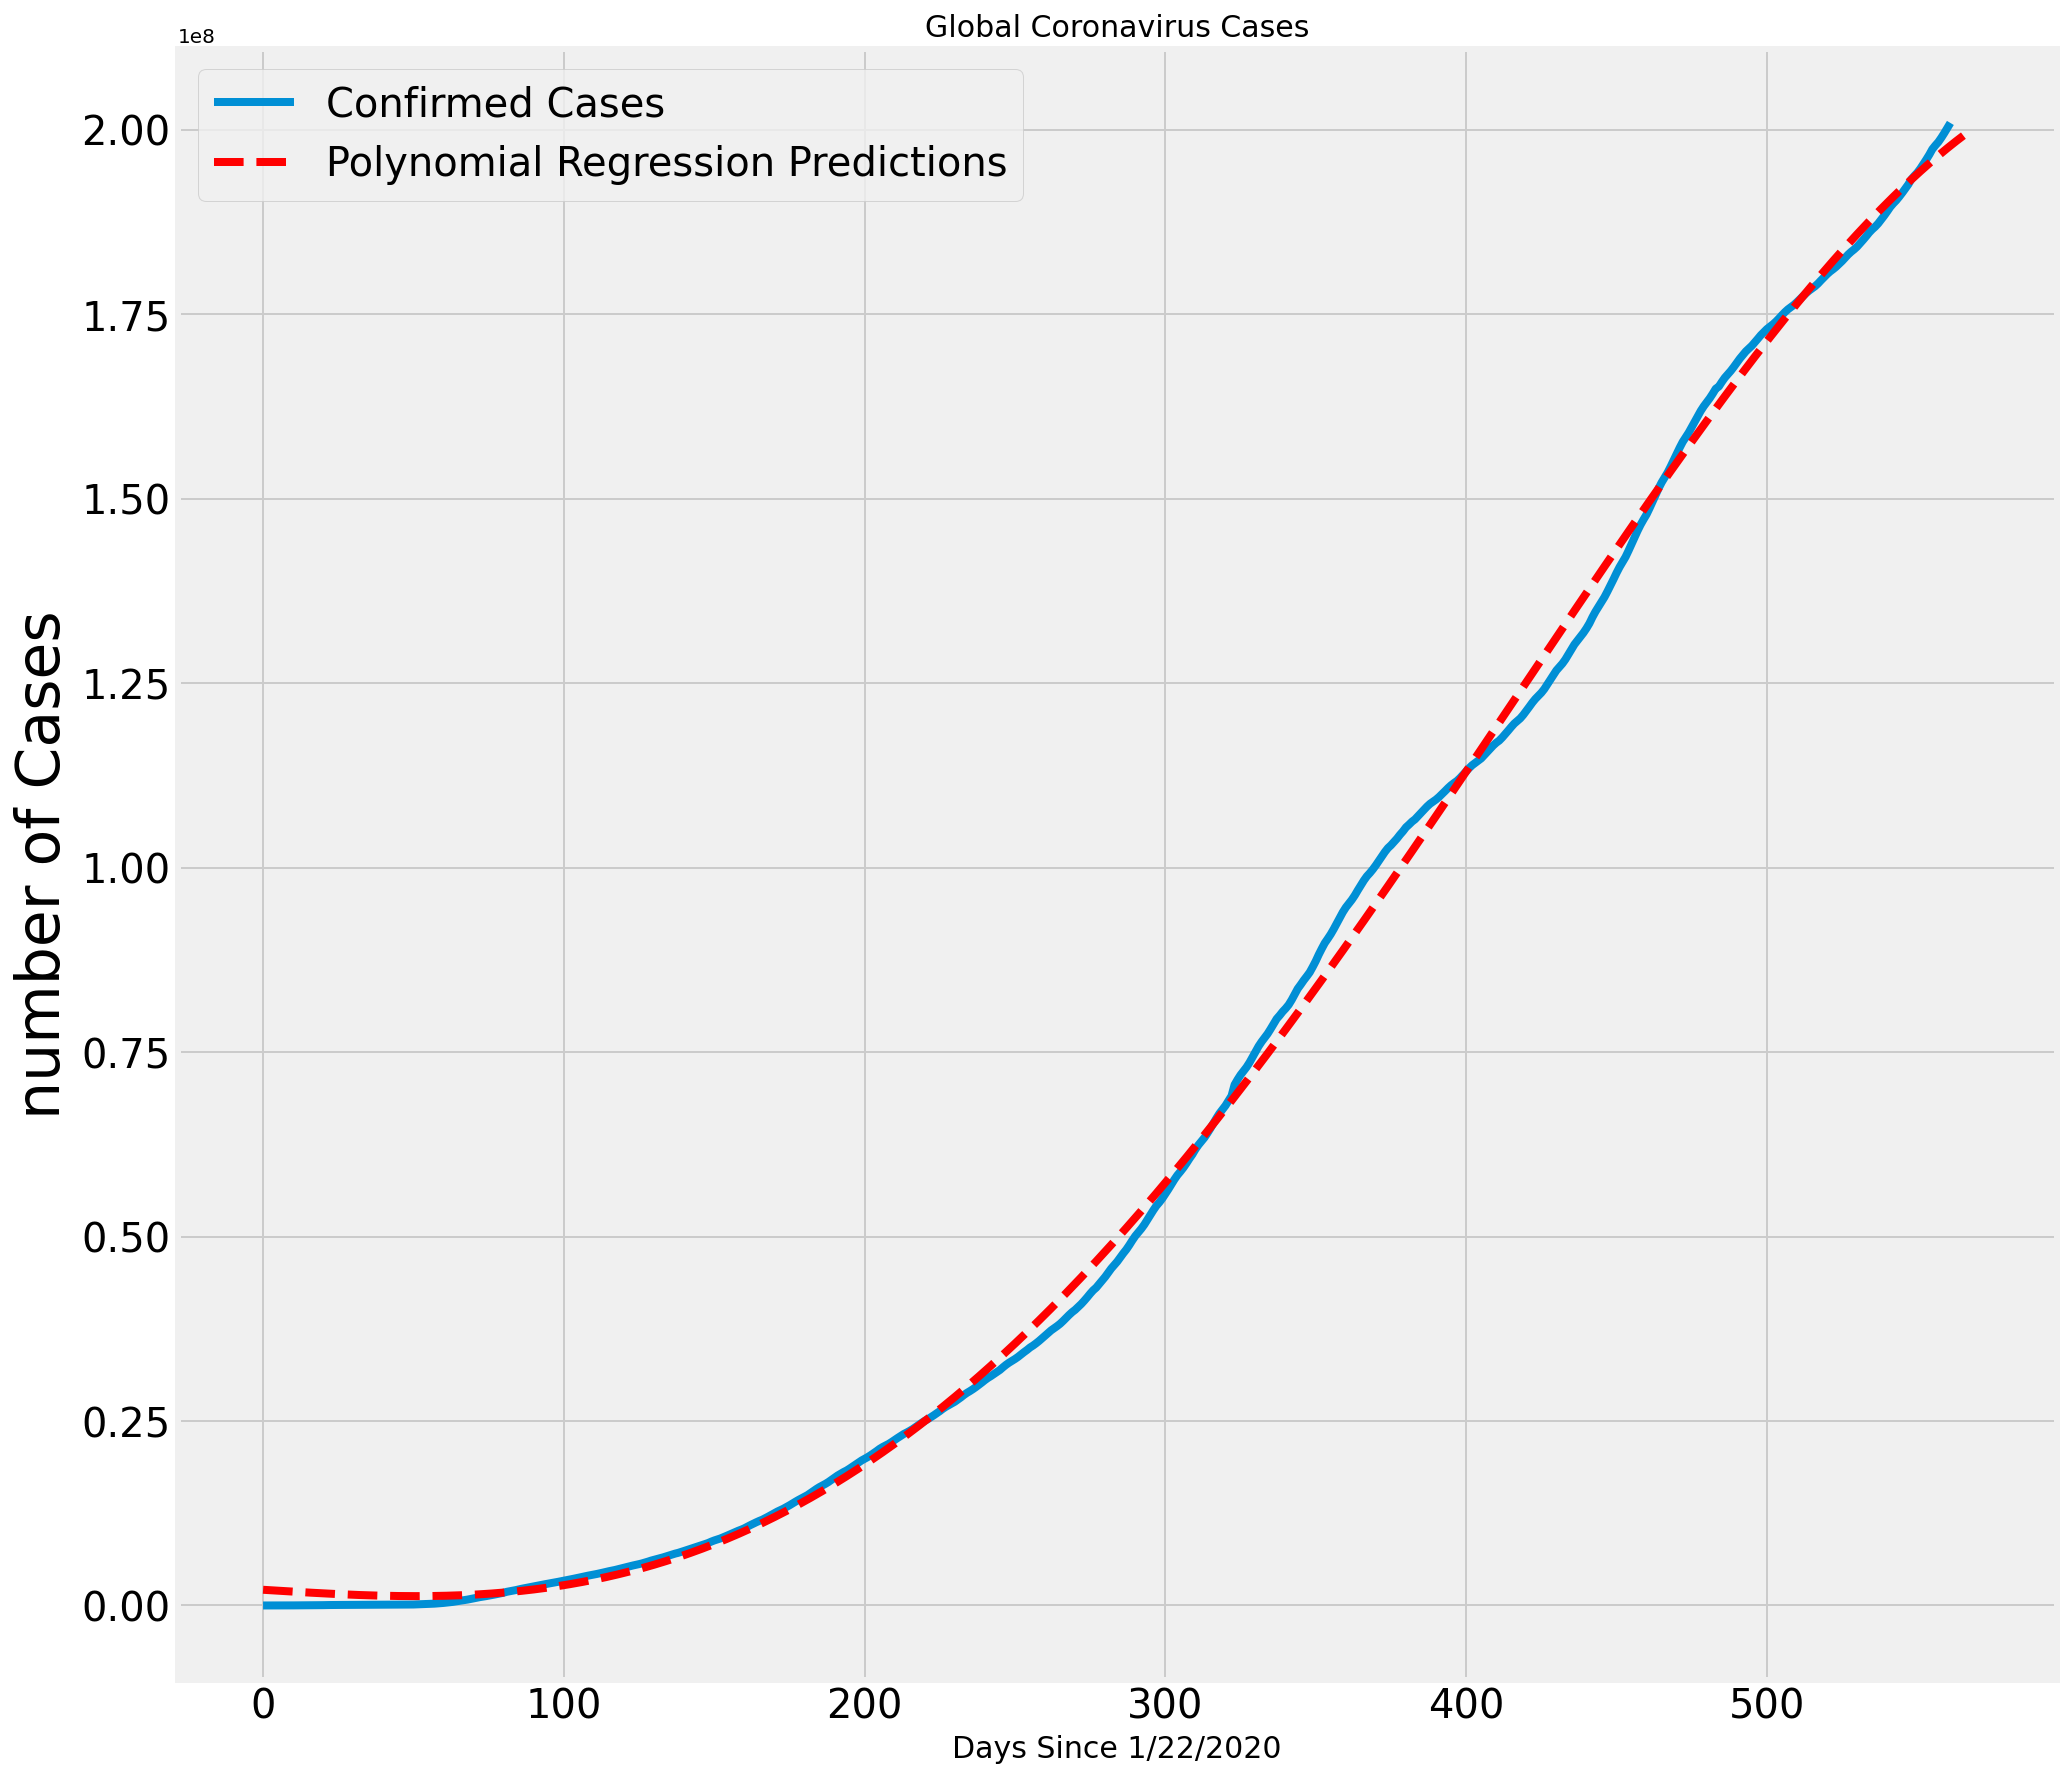

In [27]:
plt.figure(figsize=(15,15))
#x and y,minus 7 days from the date for x and cases
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, ypred, linestyle='dashed', color='red')
plt.title('Global Coronavirus Cases', size=15)
plt.xlabel('Days Since 1/22/2020', size=15)
plt.ylabel('number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()
#plt.savefig('example.pdf')

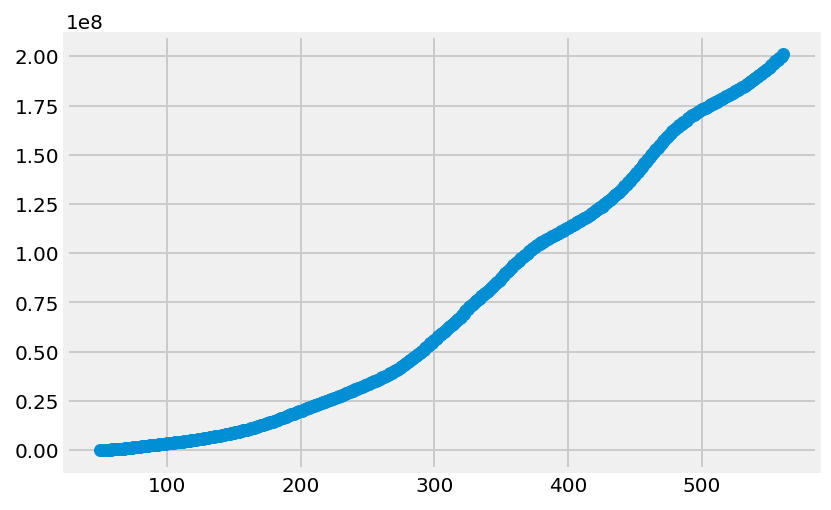

In [28]:
plt.scatter(X,y)

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

lr_r2score = r2_score(ypred_test,y_test)

In [30]:
print('R square Score = ', round(lr_r2score, 3))

R square Score =  0.999
